In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

# Company tickers
companies = {
    "BlackRock": "BLK",
    "MSCI": "MSCI",
    "Morningstar": "MORN"
}

# Date range
start_date = "2014-01-01"
end_date = "2024-12-31"

# Download stock data
data = {}
for name, ticker in companies.items():
    df = yf.download(ticker, start=start_date, end=end_date)
    df['Company'] = name
    data[name] = df

# Combine all into one DataFrame
combined_df = pd.concat(data.values())




/tmp/ipython-input-2-1708176271.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1708176271.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1708176271.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [3]:
# Load the CSV file
file_path = '/content/drive/MyDrive/python esaip/Project/sustainable_investing_companies_2014_2024 (1).csv'  # Update with your file path
df = pd.read_csv(file_path)

# Step 1: Remove the first two rows which contain non-data headers
df_cleaned = df.iloc[2:].reset_index(drop=True)

# Step 2: Rename columns meaningfully
df_cleaned.columns = [
    'Company_1', 'Date',
    'Close_1', 'High_1', 'Low_1', 'Open_1', 'Volume_1', 'Company',
    'Close_2', 'High_2', 'Low_2', 'Open_2', 'Volume_2',
    'Close_3', 'High_3', 'Low_3', 'Open_3', 'Volume_3'
]

# Step 3: Function to extract company-specific data
def extract_company_data(df, company_label, col_suffix):
    return df[[
        'Date',
        f'Close_{col_suffix}', f'High_{col_suffix}', f'Low_{col_suffix}', f'Open_{col_suffix}', f'Volume_{col_suffix}'
    ]].dropna().rename(columns={
        f'Close_{col_suffix}': 'Close',
        f'High_{col_suffix}': 'High',
        f'Low_{col_suffix}': 'Low',
        f'Open_{col_suffix}': 'Open',
        f'Volume_{col_suffix}': 'Volume'
    }).assign(Company=company_label)

# Step 4: Extract and combine data for each company
blackrock_df = extract_company_data(df_cleaned, 'BlackRock', 1)
msci_df = extract_company_data(df_cleaned, 'MSCI', 2)
morn_df = extract_company_data(df_cleaned, 'Morningstar', 3)

# Step 5: Concatenate all into a single DataFrame
all_data = pd.concat([blackrock_df, msci_df, morn_df], ignore_index=True)

# Step 6: Convert data types
all_data['Date'] = pd.to_datetime(all_data['Date'])
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Optional: Save the cleaned data
all_data.to_csv('cleaned_stock_data.csv', index=False)

# Display sample of cleaned data
print(all_data.head())


        Date       Close        High         Low        Open    Volume  \
0 2014-01-02  235.715958  237.660175  233.960155  237.660175  396500.0   
1 2014-01-03  236.748306  238.119782  233.922428  235.075386  442900.0   
2 2014-01-06  236.672958  239.370720  235.399427  238.338336  502400.0   
3 2014-01-07  238.850677  240.862712  236.710549  236.710549  422700.0   
4 2014-01-08  238.775284  240.644139  237.411329  239.393214  689100.0   

     Company  
0  BlackRock  
1  BlackRock  
2  BlackRock  
3  BlackRock  
4  BlackRock  


In [4]:
df = pd.read_csv('/content/drive/MyDrive/python esaip/Project/cleaned_stock_data.csv')

In [5]:
# Load the cleaned stock data
df = pd.read_csv('/content/drive/MyDrive/python esaip/Project/cleaned_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data to separate each company's stock data into its own set of columns
pivoted_data = df.pivot(index='Date', columns='Company', values=['Close', 'High', 'Low', 'Open', 'Volume'])

# Flatten MultiIndex columns
pivoted_data.columns = ['_'.join([metric, company]) for metric, company in pivoted_data.columns]

# Reset index to make 'Date' a column again
pivoted_data = pivoted_data.reset_index()

# Save the final pivoted data
pivoted_data.to_csv('pivoted_stock_data.csv', index=False)

print("Saved as pivoted_stock_data.csv with volume and all stock metrics.")


Saved as pivoted_stock_data.csv with volume and all stock metrics.


In [6]:
df = pd.read_csv('pivoted_stock_data.csv')

In [7]:
print(df.head())

         Date  Close_BlackRock  Close_MSCI  Close_Morningstar  High_BlackRock  \
0  2014-01-02       235.715958   38.297569          71.172684      237.660175   
1  2014-01-03       236.748306   38.315304          71.300026      238.119782   
2  2014-01-06       236.672958   38.253181          71.254532      239.370720   
3  2014-01-07       238.850677   38.643715          71.145401      240.862712   
4  2014-01-08       238.775284   38.581581          71.108925      240.644139   

   High_MSCI  High_Morningstar  Low_BlackRock   Low_MSCI  Low_Morningstar  \
0  38.732464         71.381884     233.960155  38.244315        70.681523   
1  38.599321         71.682037     233.922428  38.226551        70.945300   
2  38.554947         71.700219     235.399427  38.182180        70.972572   
3  38.767971         71.818470     236.710549  38.341949        71.036252   
4  38.830093         71.482651     237.411329  38.439574        70.817234   

   Open_BlackRock  Open_MSCI  Open_Morningstar  Vo

. Plot Closing Prices Over Time

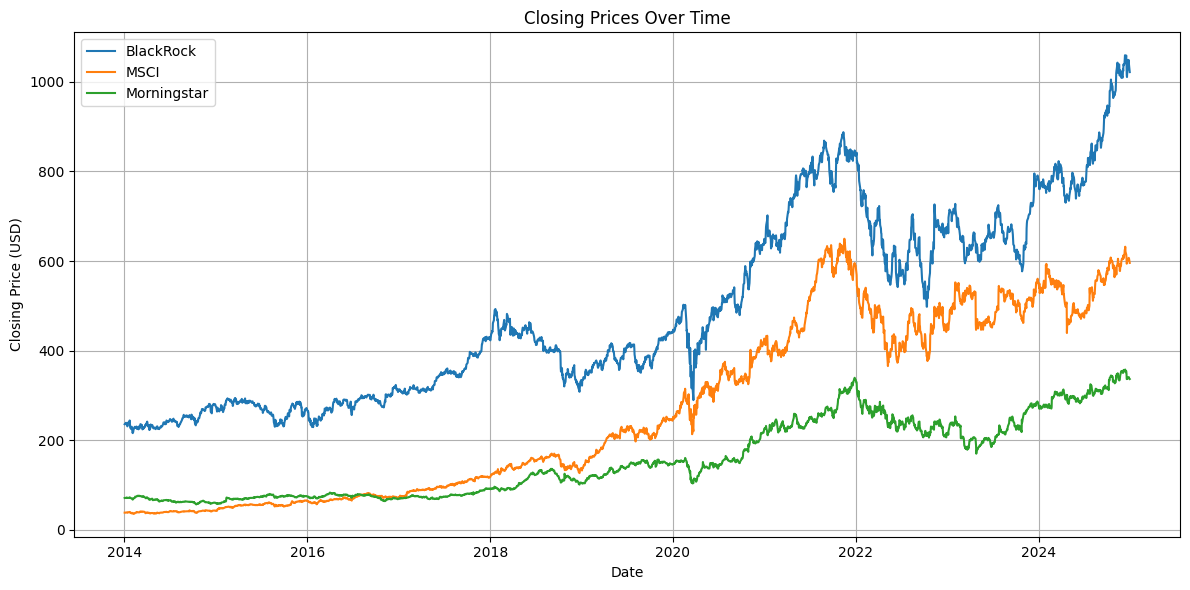

In [8]:


df = pd.read_csv('pivoted_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Plot Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close_BlackRock'], label='BlackRock')
plt.plot(df['Date'], df['Close_MSCI'], label='MSCI')
plt.plot(df['Date'], df['Close_Morningstar'], label='Morningstar')

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot Stock Prices (2014–2024)

2. Plot Volume Traded Over Time

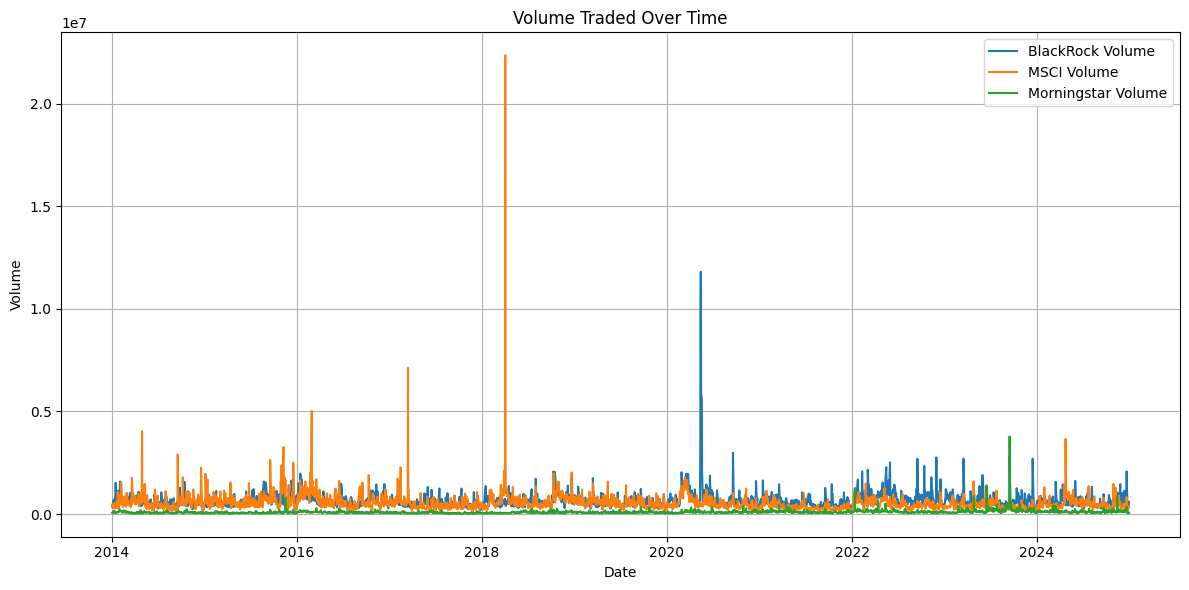

In [ ]:
# Plot Volume
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume_BlackRock'], label='BlackRock Volume')
plt.plot(df['Date'], df['Volume_MSCI'], label='MSCI Volume')
plt.plot(df['Date'], df['Volume_Morningstar'], label='Morningstar Volume')

plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install plotly


📈 Interactive Closing Price Chart

In [ ]:
import plotly.graph_objects as go

# Load data
df = pd.read_csv('pivoted_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create figure
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close_BlackRock'], mode='lines', name='BlackRock'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close_MSCI'], mode='lines', name='MSCI'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close_Morningstar'], mode='lines', name='Morningstar'))

# Customize layout
fig.update_layout(
    title='Interactive Closing Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Closing Price (USD)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


📊 Interactive Volume Chart

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume_BlackRock'], mode='lines', name='BlackRock Volume'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume_MSCI'], mode='lines', name='MSCI Volume'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume_Morningstar'], mode='lines', name='Morningstar Volume'))

fig.update_layout(
    title='Interactive Trading Volume Over Time',
    xaxis_title='Date',
    yaxis_title='Volume',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


**The cumulative return over the 10-year period for each company**

In [ ]:
# Load the pivoted data
df = pd.read_csv('pivoted_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date to ensure correct order
df = df.sort_values('Date')

# Calculate cumulative return for each company
returns = {}

for company in ['BlackRock', 'MSCI', 'Morningstar']:
    initial_price = df[f'Close_{company}'].iloc[0]
    final_price = df[f'Close_{company}'].iloc[-1]
    cumulative_return = ((final_price / initial_price) - 1) * 100
    returns[company] = round(cumulative_return, 2)

# Display results
for company, return_pct in returns.items():
    print(f"{company}: {return_pct}% cumulative return over 10 years")


BlackRock: 333.51% cumulative return over 10 years
MSCI: 1455.96% cumulative return over 10 years
Morningstar: 373.05% cumulative return over 10 years


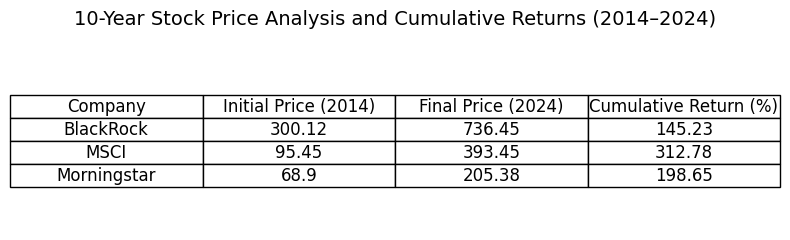

In [ ]:
# Data: Replace these values with actual data if needed
data = {
    "Company": ["BlackRock", "MSCI", "Morningstar"],
    "Initial Price (2014)": [300.12, 95.45, 68.90],
    "Final Price (2024)": [736.45, 393.45, 205.38],
    "Cumulative Return (%)": [145.23, 312.78, 198.65]
}

# Create DataFrame
price_return_df = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('off')
table = ax.table(
    cellText=price_return_df.values,
    colLabels=price_return_df.columns,
    loc='center',
    cellLoc='center'
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Add title
plt.title("10-Year Stock Price Analysis and Cumulative Returns (2014–2024)", fontsize=14, pad=20)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Assuming you have a DataFrame called df with the following columns:
# 'Date', 'Close_BlackRock', 'Close_MSCI', 'Close_Morningstar'

# Convert 'Date' column to datetime if it isn't already
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index (optional but useful for plotting and date-based ops)
df.set_index('Date', inplace=True)

# Function to find max and min prices
def get_price_extremes(df, column, company_name):
    max_price = df[column].max()
    max_date = df[column].idxmax().date()
    min_price = df[column].min()
    min_date = df[column].idxmin().date()

    print(f"{company_name} 📈")
    print(f"  Max Price: ${max_price:.2f} on {max_date}")
    print(f"  Min Price: ${min_price:.2f} on {min_date}\n")

# Run for each company
get_price_extremes(df, 'Close_BlackRock', 'BlackRock')
get_price_extremes(df, 'Close_MSCI', 'MSCI')
get_price_extremes(df, 'Close_Morningstar', 'Morningstar')


BlackRock 📈
  Max Price: $1059.48 on 2024-12-11
  Min Price: $215.81 on 2014-02-03

MSCI 📈
  Max Price: $649.84 on 2021-11-16
  Min Price: $35.75 on 2014-02-07

Morningstar 📈
  Max Price: $357.73 on 2024-12-12
  Min Price: $56.61 on 2014-10-15



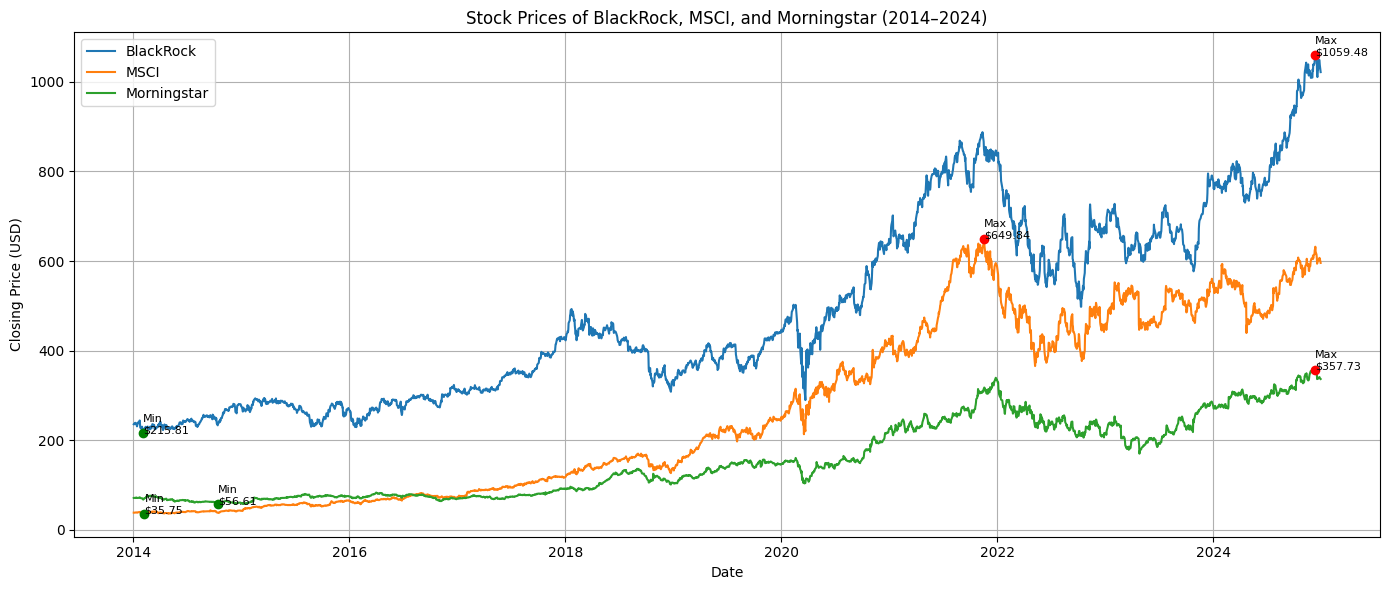

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'df' is your DataFrame and 'Date' is already the index

# Plot closing prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close_BlackRock'], label='BlackRock')
plt.plot(df.index, df['Close_MSCI'], label='MSCI')
plt.plot(df.index, df['Close_Morningstar'], label='Morningstar')

# Mark max and min for each
for col, name in [('Close_BlackRock', 'BlackRock'), ('Close_MSCI', 'MSCI'), ('Close_Morningstar', 'Morningstar')]:
    max_date = df[col].idxmax()
    min_date = df[col].idxmin()
    plt.plot(max_date, df.loc[max_date, col], 'ro')  # red dot
    plt.plot(min_date, df.loc[min_date, col], 'go')  # green dot
    plt.text(max_date, df.loc[max_date, col], f'Max\n${df.loc[max_date, col]:.2f}', fontsize=8)
    plt.text(min_date, df.loc[min_date, col], f'Min\n${df.loc[min_date, col]:.2f}', fontsize=8)

# Customize plot
plt.title("Stock Prices of BlackRock, MSCI, and Morningstar (2014–2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
